1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
import scipy.integrate as integr
import math

%matplotlib inline

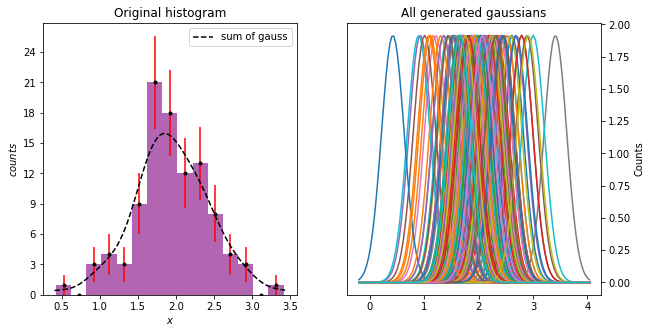

In [2]:
N = 100
sigma = 0.5
mean = 2

x = np.random.normal(mean,sigma,N)
n_bins = 15
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
n, bins, patches = ax1.hist(x, n_bins, range=(x.min(),x.max()), histtype='bar', color='purple', alpha = 0.6)
ax1.set_title('Original histogram')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$counts$')
ax1.yaxis.set_major_locator(MaxNLocator(integer = True))
Mid_bins = 1/2 * (bins[1:] + bins[:-1])
ax1.errorbar(Mid_bins,n,yerr = (np.sqrt(n)), ecolor = 'r',fmt = '.k' )
grid = 120
std_value = 1.06*x.std()*x.size**(-0.2)
x1 = np.linspace(x.min() - 3*std_value, x.max() +3*std_value, grid) 
ngauss = np.zeros((N,grid))
ax2.set_ylabel('Counts')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
i=0
for p in x:
    ngauss [i,:] = stats.norm.pdf(x1, p, std_value)
    i+=1
    ax2.plot(x1, stats.norm.pdf(x1, p, std_value))

gauss_sum = np.sum(ngauss, axis=0)
integral0 = integr.trapz(n, Mid_bins)
integral1 = integr.trapz(gauss_sum, x1)
normalization = integral0/integral1
gauss_sum = gauss_sum * normalization
delta = int(np.trunc(3*std_value/(x.max() - x.min() + 6*std_value)*grid))
ax1.plot(x1[delta:(len(x1)-delta)], gauss_sum[delta:(len(gauss_sum)-delta)], '--', color='black', label='sum of gauss')
ax1.legend(loc='best')
ax2.set_title('All generated gaussians')
plt.show()


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2021-12-14 23:28:08--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2021-12-14 23:28:09--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc11a5eb4f9344e5040b343e60c8.dl.dropboxusercontent.com/cd/0/inline/Bb2iQq74Meoy-XQIwplO1QuPU32ZBASYBwS2NE4pCATXEBXR1BU9XHP_3hXHclAa-X34L2t_NRQOrbQ5u4xOhyCrJN__m9lg0FHRGDkOtf-raKhYIOadJGt0ZQFOTjJ8YoOkn5Qnzbcdzj84bztF6pYp/file# [following]
--2021-12-14 23:28:10--  https://uc11a5eb4f9344e5040b343e60c8.dl.dropboxusercontent.com/cd/0/inline/Bb2iQq74Meoy-XQIwplO1QuPU32ZBA

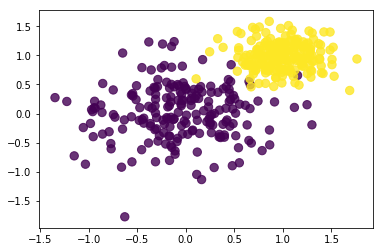

In [10]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

In [11]:
import seaborn as sns

/home/ale/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  
/home/ale/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


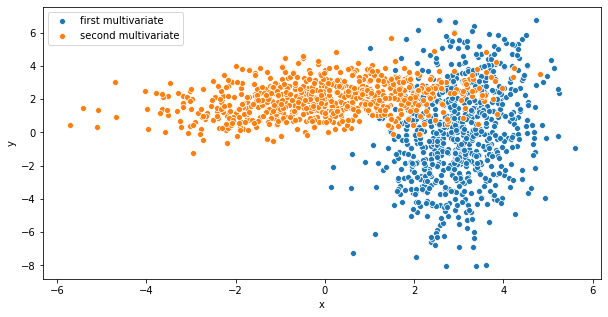

In [17]:
N = 800
mean1 = [3,0]
mean2 = [0,2]
cov1 = [[0.8,3],[0.2,7]]
cov2 = [[0.2,0.9],[3,0.6]]
gauss_1 = np.random.multivariate_normal(mean1, cov1, N)
gauss_2 = np.random.multivariate_normal(mean2, cov2, N)


df1 = pd.DataFrame(gauss_1, columns = ["x", "y"])
df2 = pd.DataFrame(gauss_2, columns = ["x", "y"])


fig, ax = plt.subplots(figsize = (10,5))
sns.scatterplot(data = df1, x = 'x', y = 'y', ax = ax, label = 'first multivariate');
sns.scatterplot(data = df2, x = 'x', y = 'y', ax = ax, label = 'second multivariate');
ax.legend()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [6]:
#!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

In [13]:
data = pd.DataFrame(np.load('residuals_261.npy', allow_pickle = True).item())
data


residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]

In [14]:
mask = abs(data['residuals'])<2
data_1 = data[mask]
data_1
#slope, intercept, r_value, p_value, std_err = stats.linregress(data_1['distances'],data_1['residuals'])

residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]

<Figure size 432x288 with 0 Axes>

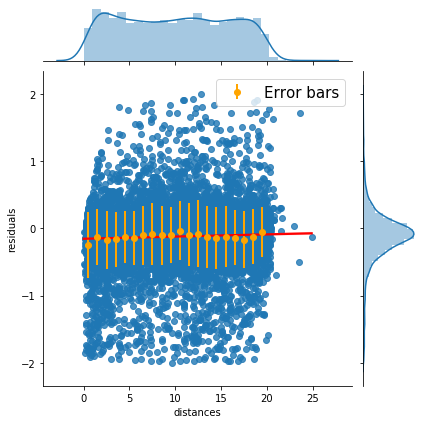

In [16]:
nbins = 20
mid = 10/nbins
x = np.linspace(mid,20-mid,num=nbins)   
#print(x)
y = np.zeros(nbins)
erry = np.zeros(nbins)
for i in range(nbins):
    mask = (data_1['distances'] > i) & (data_1['distances'] < (i + 1))
    y[i] = data_1['residuals'][mask].mean()
    erry[i] = data_1['residuals'][mask].std()

#print(y)
#print(erry)
plt.figure()
plot = sns.jointplot("distances", "residuals", data=data_1, kind="reg",joint_kws={'line_kws': {'color': 'red'}})
plt.errorbar(x, y, erry, label = 'Error bars', linewidth = 2, fmt = 'o', c='orange')
plt.legend(loc = "best", fontsize = 15)